# Import Data

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive


In [2]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/customer_lifetime_value_dataset.csv')
df.head()

,customerid,firstpurchasedate,lastpurchasedate,totalpurchases,totalrevenue,referralsource,churnindicator,discountsused,productcategory,responsetolastcampaign,feedbackscore,preferredpaymentmethod,supportticketsraised,hasloyaltycard,frequency
0,8519,2021-12-31,2022-03-06,7,11670,Online advertisements,0,2,Q02,ignored,4.729998,debit card,0,no,7
1,38152,2019-09-27,2023-02-02,20,5260,Traditional media outreach,1,6,F76,purchased,4.184512,cash,0,no,2
2,19680,2021-06-13,2022-02-04,29,9790,Influencer endorsements,0,2,X04,opened mail,4.346640,google pay,0,no,4
3,35744,2021-07-28,2022-08-21,15,9591,Influencer endorsements,0,5,A25,ignored,5.000000,debit card,0,no,13
4,11663,2021-01-19,2022-03-10,13,10134,Word of mouth,0,3,A16,ignored,4.482089,credit card,0,no,11


# Basic Feature Engineering:
1. Create 'avgpurchasevalue' Average value of purchases made by the customer (totalrevenue/totalpurchases).
2. Create 'recency' Number of days since the last purchase.
3. Create 'tenure' Number of days since the customer's first purchase (useful for understanding how long they've been a customer).
4. Create 'avgtimebetweenpurchases': Average number of days between purchases.

In [3]:
# 1. Create 'avgpurchasevalue' Average value of purchases made by the customer (totalrevenue/totalpurchases).
df['avgpurchasevalue'] = df['totalrevenue'] / df['totalpurchases']

In [4]:
# 2. Create 'recency' Number of days since the last purchase. Considering a constant date of '2023-09-01' to create the column.
df['recency'] = (pd.to_datetime('2023-09-01') - pd.to_datetime(df['lastpurchasedate'])).dt.days

In [5]:
# 3. Create 'tenure' Number of days since the customer's first purchase (useful for understanding how long they've been a customer).
df['tenure'] = (pd.to_datetime('2023-09-01') - pd.to_datetime(df['firstpurchasedate'])).dt.days

In [6]:
# 4. Create 'avgtimebetweenpurchases': Average number of days between purchases.
df['avgtimebetweenpurchases'] = df['tenure']/df['totalpurchases']

In [7]:
df.head()

,customerid,firstpurchasedate,lastpurchasedate,totalpurchases,totalrevenue,referralsource,churnindicator,discountsused,productcategory,responsetolastcampaign,feedbackscore,preferredpaymentmethod,supportticketsraised,hasloyaltycard,frequency,avgpurchasevalue,recency,tenure,avgtimebetweenpurchases
0,8519,2021-12-31,2022-03-06,7,11670,Online advertisements,0,2,Q02,ignored,4.729998,debit card,0,no,7,1667.142857,544,609,87.000000
1,38152,2019-09-27,2023-02-02,20,5260,Traditional media outreach,1,6,F76,purchased,4.184512,cash,0,no,2,263.000000,211,1435,71.750000
2,19680,2021-06-13,2022-02-04,29,9790,Influencer endorsements,0,2,X04,opened mail,4.346640,google pay,0,no,4,337.586207,574,810,27.931034
3,35744,2021-07-28,2022-08-21,15,9591,Influencer endorsements,0,5,A25,ignored,5.000000,debit card,0,no,13,639.400000,376,765,51.000000
4,11663,2021-01-19,2022-03-10,13,10134,Word of mouth,0,3,A16,ignored,4.482089,credit card,0,no,11,779.538462,540,955,73.461538


# <center> EDA

### Preliminary EDA:
    1. Load the provided dataset into a Pandas DataFrame. Display the first 5 rows of the DataFrame to understand its structure.
    2. Generate a report detailing the data types of each column in the dataset. How many of them are categorical? How many are numerical?
    3. Compute and display basic statistical summaries (mean, median, standard deviation, etc.) for all the numerical columns in the dataset.
    4. Identify any missing values in the dataset. How many missing values are there in each column?

In [219]:
#1. Done in previous step.

In [8]:
#2. Generate a report detailing the data types of each column in the dataset. How many of them are categorical? How many are numerical?
df.info()
print("\n")
print(f"Categorical columns: {len(df.select_dtypes('object').columns)}")
print(f"Numerical columns: {len(df.select_dtypes('number').columns)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerid               10000 non-null  int64  
 1   firstpurchasedate        10000 non-null  object 
 2   lastpurchasedate         10000 non-null  object 
 3   totalpurchases           10000 non-null  int64  
 4   totalrevenue             10000 non-null  int64  
 5   referralsource           10000 non-null  object 
 6   churnindicator           10000 non-null  int64  
 7   discountsused            10000 non-null  int64  
 8   productcategory          10000 non-null  object 
 9   responsetolastcampaign   10000 non-null  object 
 10  feedbackscore            10000 non-null  float64
 11  preferredpaymentmethod   10000 non-null  object 
 12  supportticketsraised     10000 non-null  object 
 13  hasloyaltycard           10000 non-null  object 
 14  frequency              

In [9]:
#Compute and display basic statistical summaries (mean, median, standard deviation, etc.) for all the numerical columns in the dataset.
df[df.select_dtypes('number').columns].describe()

,customerid,totalpurchases,totalrevenue,churnindicator,discountsused,feedbackscore,frequency,avgpurchasevalue,recency,tenure,avgtimebetweenpurchases
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,27519.237400,19.28050,8521.876100,0.498700,2.993600,4.433905,10.053700,629.636381,553.028900,1106.549300,78.764939
std,13118.347463,7.82962,2388.452322,0.500023,2.005283,0.920760,7.098652,816.565606,392.283779,392.949289,99.301024
min,5000.000000,1.00000,4401.000000,0.000000,0.000000,1.006071,1.000000,123.150000,2.000000,7.000000,0.280000
25%,16144.750000,13.00000,6427.750000,0.000000,1.000000,4.251318,4.000000,314.570238,222.000000,821.000000,41.031250
50%,27617.000000,20.00000,8543.000000,0.000000,3.000000,4.985672,9.000000,435.362732,483.500000,1167.000000,56.700893
75%,38967.250000,26.00000,10589.250000,1.000000,5.000000,5.000000,14.000000,649.432456,827.000000,1445.000000,83.111111
max,49994.000000,40.00000,12678.000000,1.000000,6.000000,5.000000,31.000000,12658.000000,1650.000000,1670.000000,1658.000000


### Univariate Analysis:
    1. Plot histograms for all numerical columns in the dataset. What distributions can you identify based on the histograms?
    2. For each categorical column, generate bar plots depicting the frequency of each category. Which category dominates in each column?


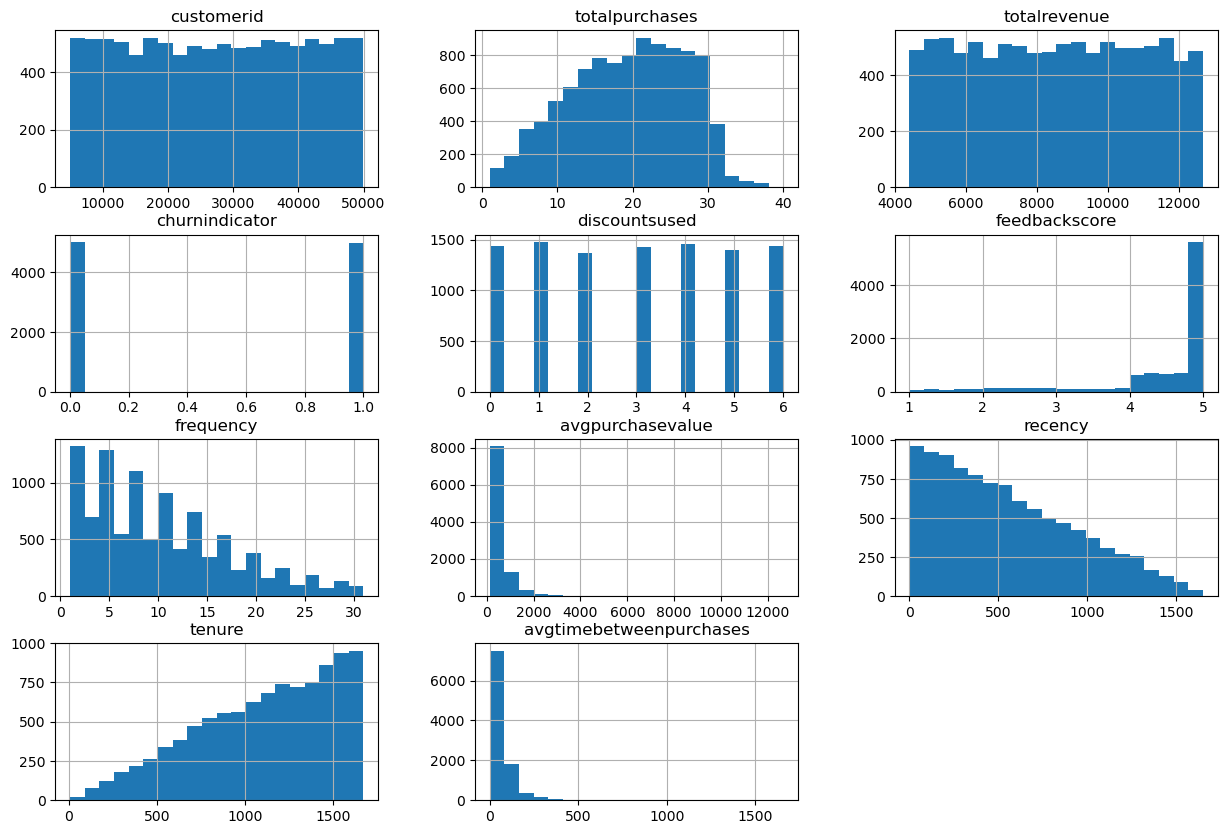

In [10]:
# Plot histograms for all numerical columns in the dataset. What distributions can you identify based on the histograms?
df[df.select_dtypes('number').columns].hist(bins=20, figsize=(15,10))
plt.show()

In [11]:
#Total purchases --> Normal distribution
#Total revenue --> Uniform distribution
#Tenure --> Negative linear regression.
#Recency --> Negative linear regression.

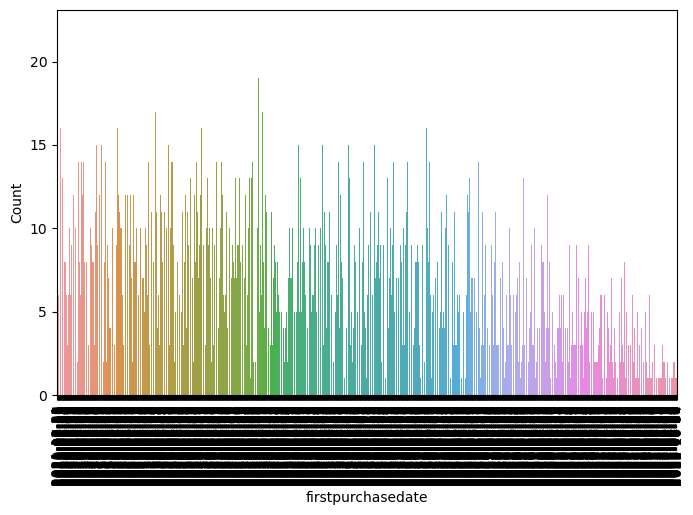

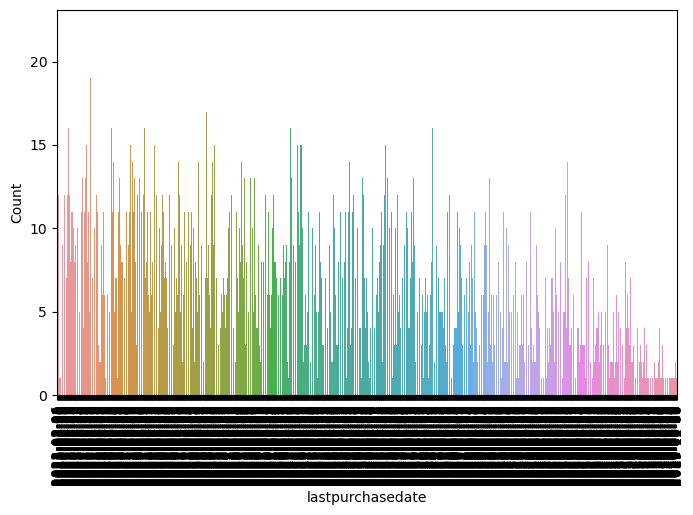

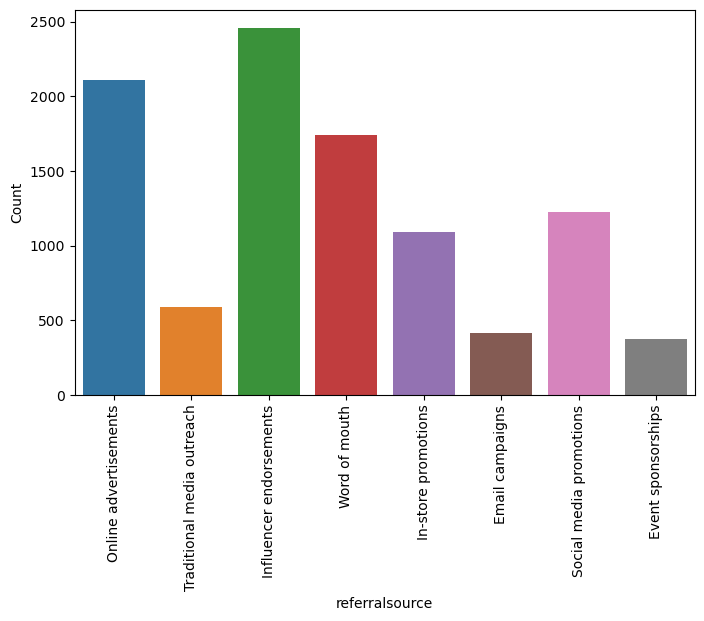

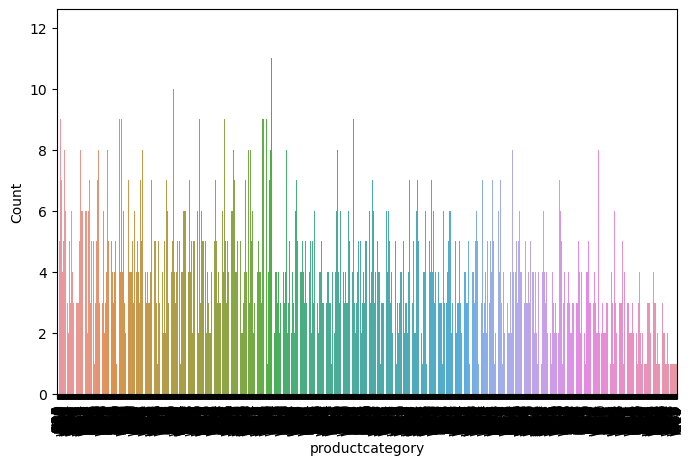

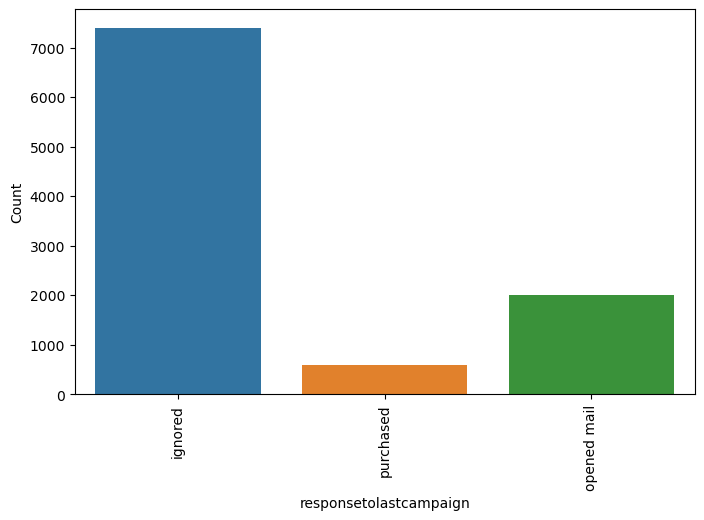

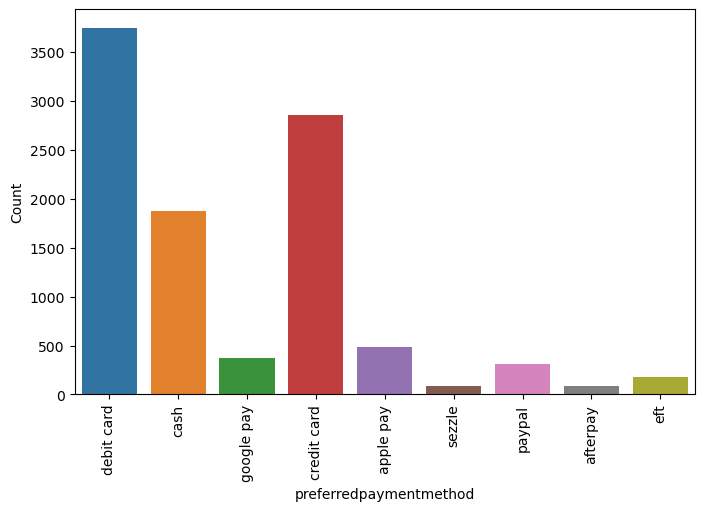

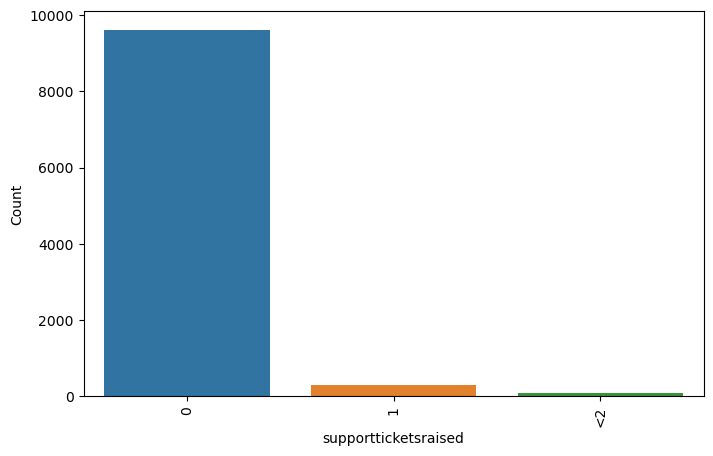

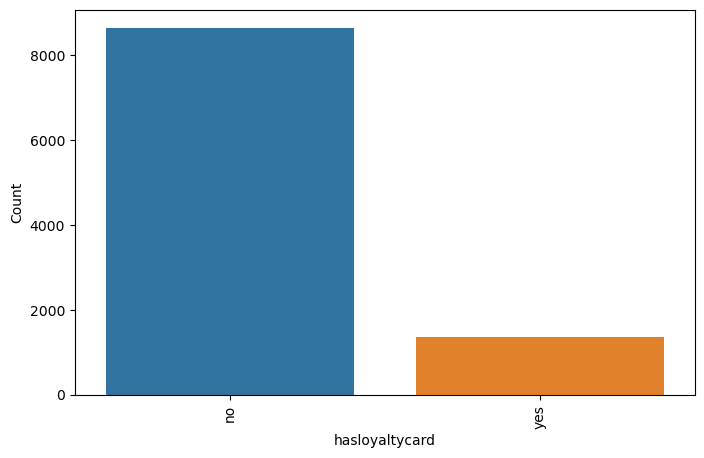

In [12]:
# For each categorical column, generate bar plots depicting the frequency of each category. Which category dominates in each column?
for column in df.select_dtypes('object').columns:
  plt.figure(figsize=(8, 5))
  sns.countplot(data=df, x=column)
  plt.xticks(rotation=90)
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.show()

### Bivariate Analysis:
    1. Construct a correlation matrix for all the numerical features in the dataset. Which pairs of features are highly correlated? Are there any unexpected correlations?
    2. Use box plots to compare the distribution of a chosen numerical column (e.g., TotalRevenue) across different categories in the dataset. Which category tends to have higher values for the chosen numerical column?


<AxesSubplot:>

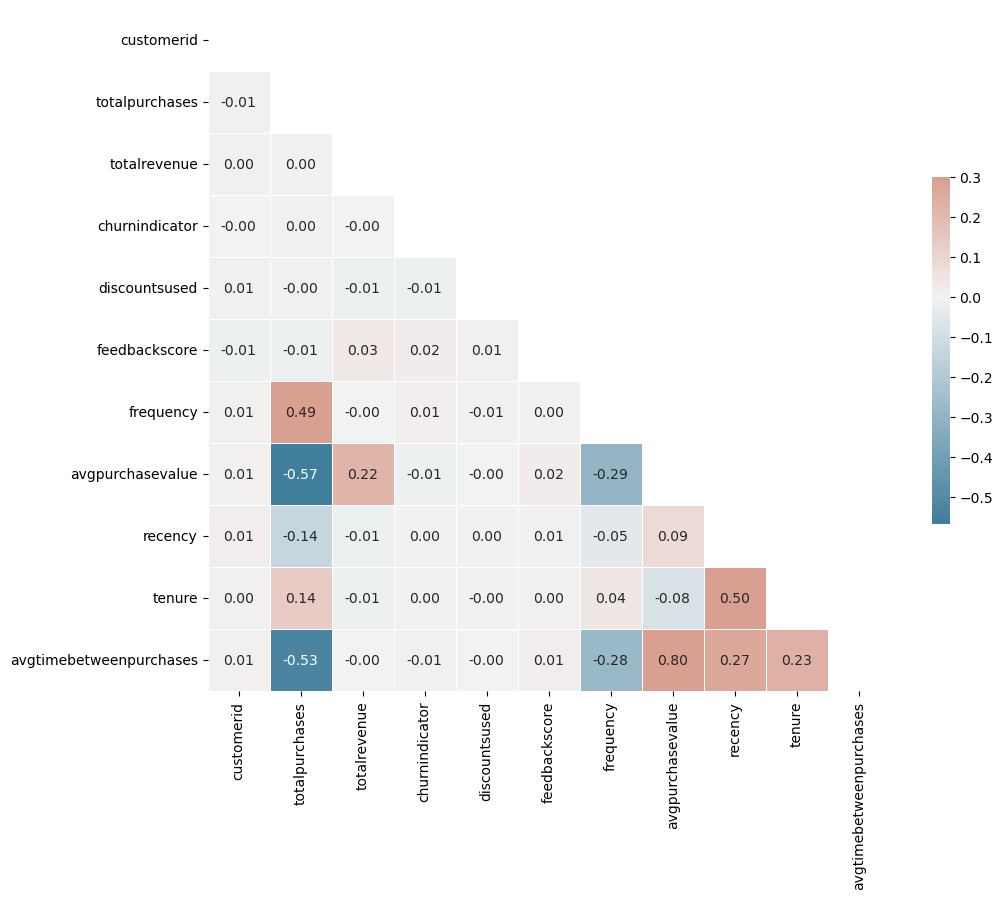

In [225]:
corr = df[df.select_dtypes('number').columns].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

In [13]:
df.select_dtypes('object').columns

Index(['firstpurchasedate', 'lastpurchasedate', 'referralsource',
       'productcategory', 'responsetolastcampaign', 'preferredpaymentmethod',
       'supportticketsraised', 'hasloyaltycard'],
      dtype='object')

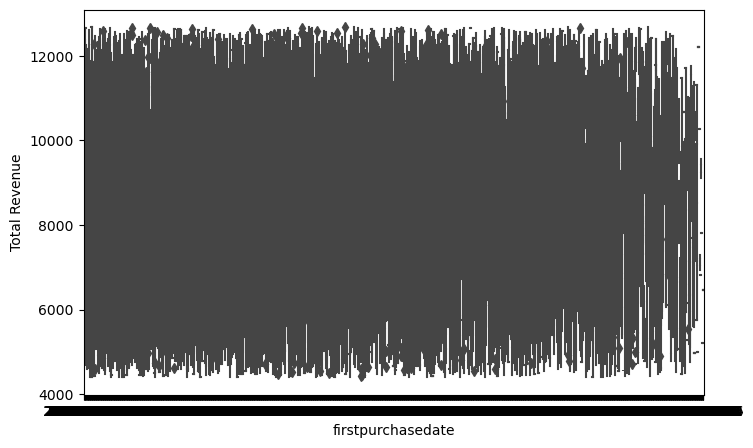

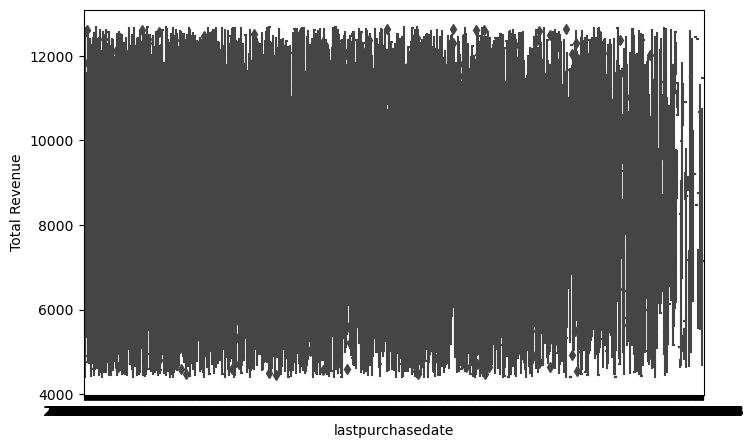

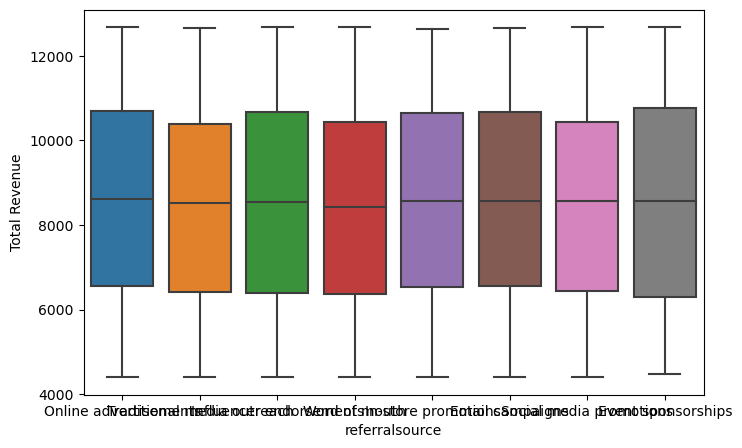

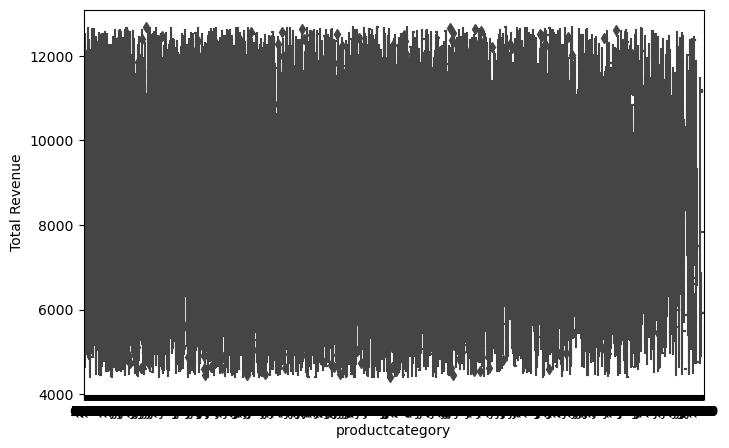

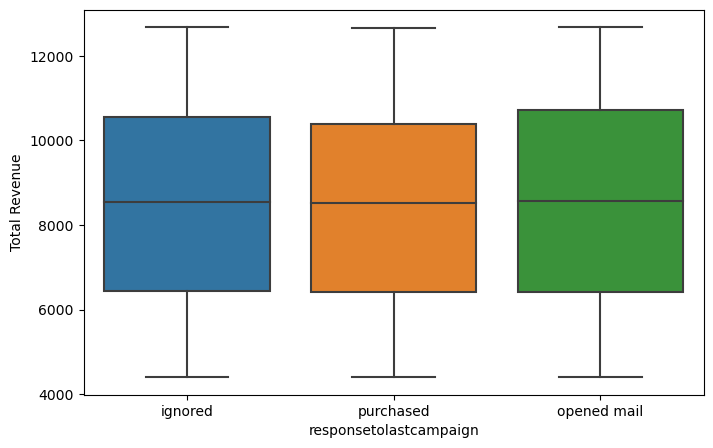

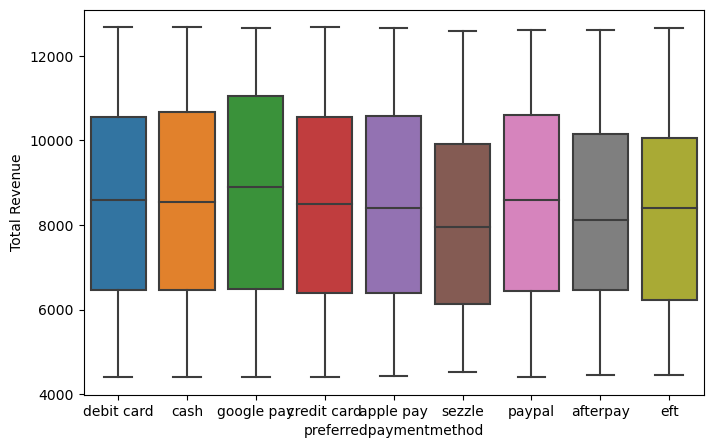

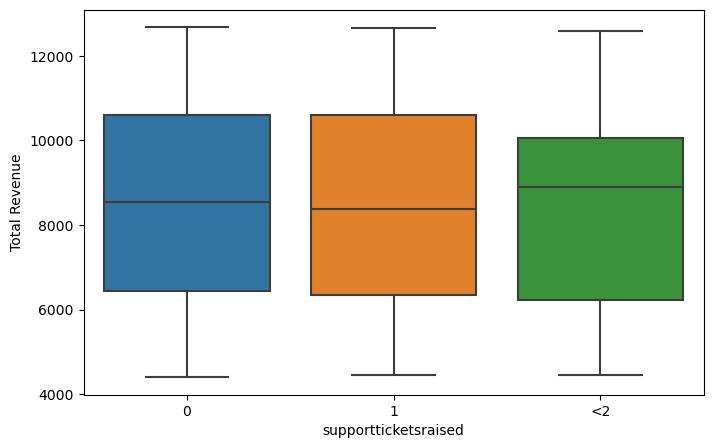

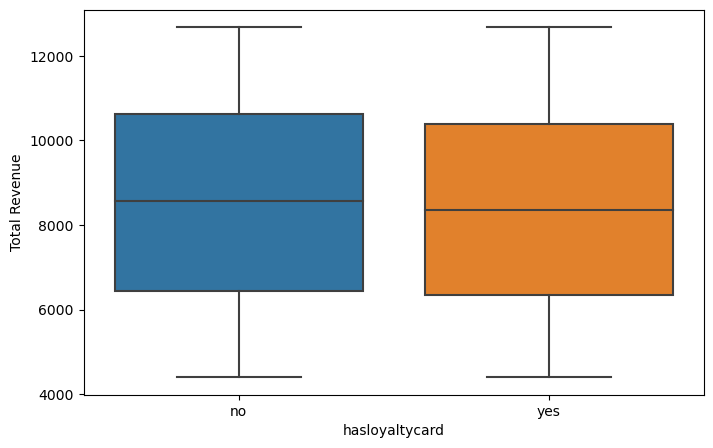

In [227]:
# Use box plots to compare the distribution of a chosen numerical column (e.g., TotalRevenue) across different categories in the dataset.
#Which category tends to have higher values for the chosen numerical column?
for column in df.select_dtypes('object').columns:
  plt.figure(figsize=(8, 5))
  sns.boxplot(data=df, x=column, y='totalrevenue')
  plt.xlabel(column)
  plt.ylabel('Total Revenue')
  plt.show()

In [14]:
# Create a range for recency
rfm_plot = df.groupby('customerid')['recency'].mean().reset_index()
rfm_plot['recency_range'] = pd.cut(rfm_plot['recency']//30, bins=[0, 1, 3, 6, 12, 24, 36, 350], labels=['< 1 month', '2-3 months', '4-6 months', '7-12 months', '2 yrs', '3 yrs', '+ 4 years'])

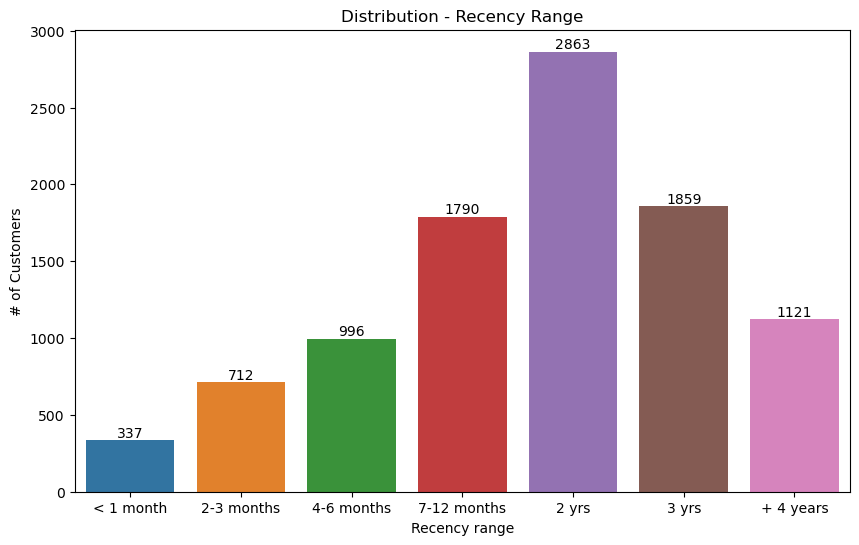

In [15]:
# Visualize the recency range distribution

plt.figure(figsize=(10, 6))
ax = sns.countplot(x=rfm_plot['recency_range'])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Recency range')
plt.ylabel('# of Customers')
plt.title('Distribution - Recency Range')
plt.show()


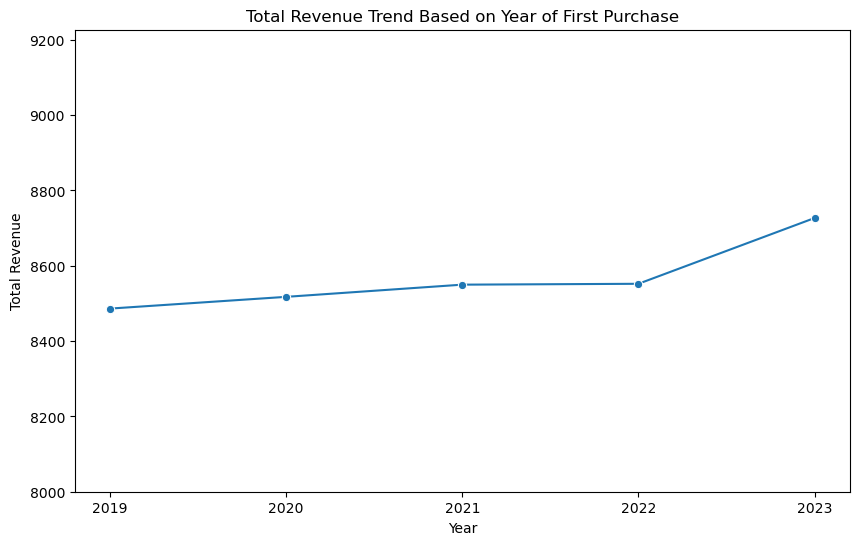

In [16]:
# Evaluate the average revenue according to the first purchase year
df['yearfirstpurchase'] = pd.to_datetime(df['firstpurchasedate']).dt.year.astype(int)
df_plot = df.groupby(df['yearfirstpurchase'])['totalrevenue'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=df_plot['yearfirstpurchase'], y=df_plot['totalrevenue'], marker='o', linestyle='-')
plt.xticks(df_plot['yearfirstpurchase'][::1])
plt.ylim(8000, df_plot['totalrevenue'].max() + 500)
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Trend Based on Year of First Purchase')
plt.show()


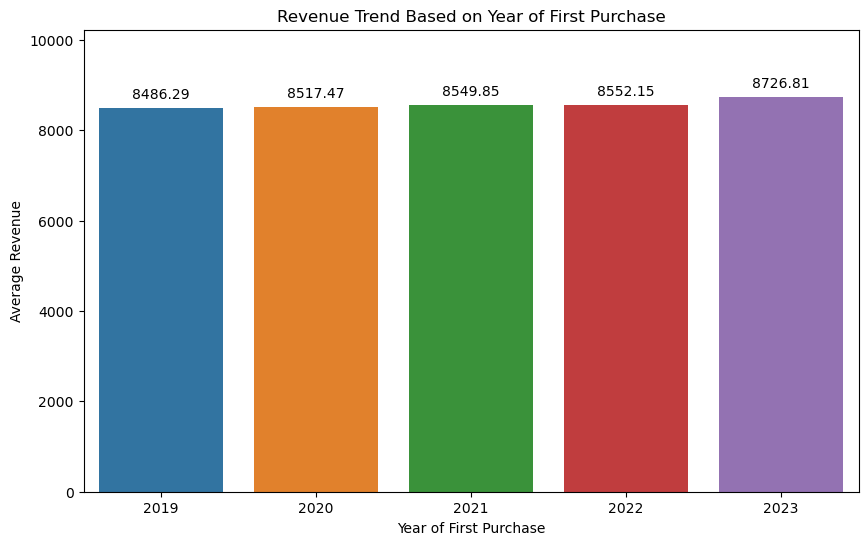

In [17]:
# Evaluate the average revenue according to the first purchase year
df['yearfirstpurchase'] = pd.to_datetime(df['firstpurchasedate']).dt.year.astype(int)
df_plot = df.groupby(df['yearfirstpurchase'])['totalrevenue'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_plot['yearfirstpurchase'], y=df_plot['totalrevenue'])
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.ylim(0, df_plot['totalrevenue'].max() + 1500)
plt.xlabel('Year of First Purchase')
plt.ylabel('Average Revenue')
plt.title('Revenue Trend Based on Year of First Purchase')
plt.show()


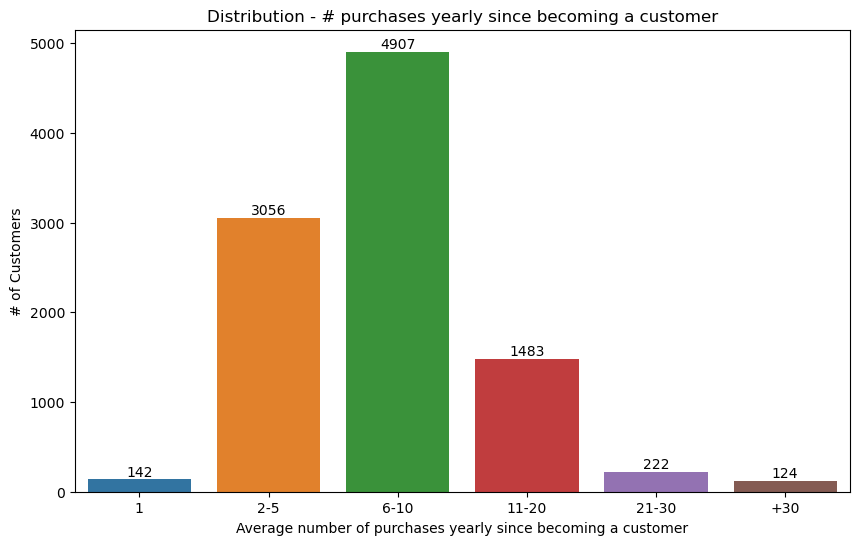

In [18]:
# Visualize the frequency range distribution
purch_plot = df
purch_plot['pruchases_range'] = pd.cut(df['totalpurchases']/(df['tenure']/365), bins=[0, 1, 5, 10, 20, 30, 50], labels=['1', '2-5', '6-10', '11-20', '21-30', '+30'])

plt.figure(figsize=(10, 6))
ax = sns.countplot(x=purch_plot['pruchases_range'] )
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Average number of purchases yearly since becoming a customer')
plt.ylabel('# of Customers')
plt.title('Distribution - # purchases yearly since becoming a customer')
plt.show()


### Advanced Analysis:
    1. Use a pair plot to visualize relationships between a select set of columns (totalpurchases, totalrevenue, avgpurchasevalue, frequency). Can you identify any clusters or outliers from the plots?
    2. Analyze the total revenue trend based on the year of the first purchase. In which year did customers contribute the most to total revenue?
    3. Use the RFM (Recency, Frequency, Monetary) model to identify the top 5% of customers. List their customerid and associated RFM_Score.


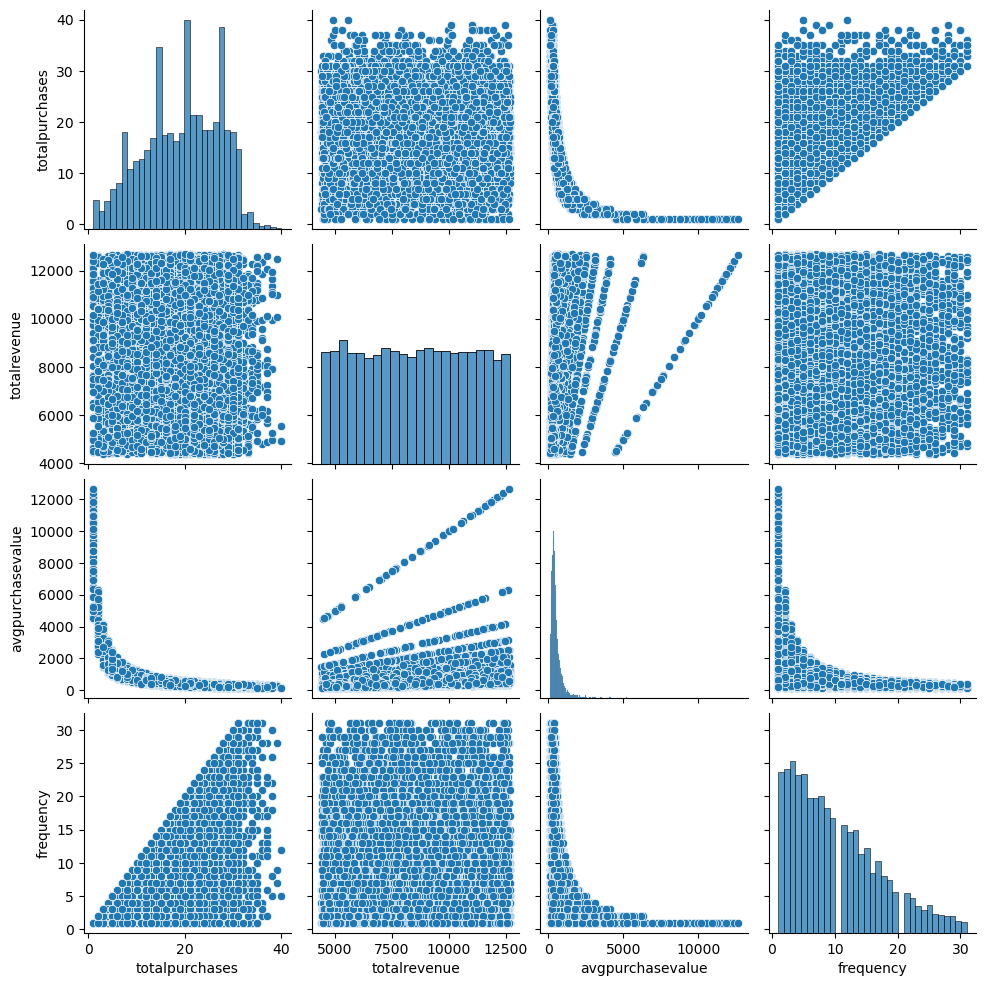

In [19]:
# Use a pair plot to visualize relationships between a select set of columns (totalpurchases, totalrevenue, avgpurchasevalue, frequency).
#Can you identify any clusters or outliers from the plots?
sns.pairplot(df[['totalpurchases', 'totalrevenue', 'avgpurchasevalue', 'frequency']])
plt.show()

In [ ]:
#There is no outliers present.

In [21]:
# RFM table
# Aggregate data by each customer
rfm = df.groupby('customerid')['recency', 'totalpurchases', 'totalrevenue'].mean().reset_index()
rfm.head()

C:\Users\Danielle\AppData\Local\Temp\ipykernel_36172\1588748641.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rfm = df.groupby('customerid')['recency', 'totalpurchases', 'totalrevenue'].mean().reset_index()


,customerid,recency,totalpurchases,totalrevenue
0,5000,602.0,6.0,12490.0
1,5001,772.0,18.0,12432.0
2,5004,1418.0,18.0,12068.0
3,5007,32.0,16.0,10037.0
4,5013,1248.0,30.0,10320.0


In [22]:
#Define quartiles for RFM score:
quantiles = rfm.quantile(q=[0.20,0.4,0.6,0.8])
quantiles = quantiles.to_dict()

def RFMScore(x,p,d):
    if x <= d[p][0.20]:
        return 1
    elif x <= d[p][0.40]:
        return 2
    elif x <= d[p][0.60]:
        return 3
    elif x <= d[p][0.80]:
        return 4
    else:
        return 5

In [23]:
rfm['R'] = rfm['recency'].apply(RFMScore, args=('recency',quantiles,))
rfm['F'] = rfm['totalpurchases'].apply(RFMScore, args=('totalpurchases',quantiles,))
rfm['M'] = rfm['totalrevenue'].apply(RFMScore, args=('totalrevenue',quantiles,))

rfm.head()
# Concat RFM quartile values to create RFM Segments
def join_rfm(x):
  return str(x['R']) + str(x['F']) + str(x['M'])

rfm['RFM_Segment'] = rfm.apply(join_rfm, axis=1)

# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

In [24]:
col_category = ['R','F', 'M']

rfm[col_category] = rfm[col_category].astype('category')

In [25]:
rfm['customer_classification'] = 'no class'

In [26]:
# Tranform RFM in customer groups
rfm.loc[(rfm['R'].isin(['5'])) & (rfm['F'].isin(['5'])) & (rfm['M'].isin(['5'])), 'customer_classification'] = 'Soulmates'
rfm.loc[(rfm['R'].isin(['4', '5'])) & (rfm['F'].isin(['3', '4', '5'])) & (rfm['M'].isin(['3', '4', '5'])), 'customer_classification'] = 'Lovers'
rfm.loc[(rfm['R'].isin(['5'])) & (rfm['F'].isin(['1'])) & (rfm['M'].isin(['4', '5'])), 'customer_classification'] = 'New Passions'
rfm.loc[(rfm['R'].isin(['4'])) & (rfm['F'].isin(['1'])) & (rfm['M'].isin(['4'])), 'customer_classification'] = 'Flirting'
rfm.loc[(rfm['R'].isin(['1'])) & (rfm['F'].isin(['1'])) & (rfm['M'].isin(['4'])), 'customer_classification'] = 'Apprentice'
rfm.loc[(rfm['R'].isin(['3','4'])) & (rfm['F'].isin(['3'])) & (rfm['M'].isin(['3','4'])), 'customer_classification'] = 'Platonic Friends'
rfm.loc[(rfm['R'].isin(['5'])) & (rfm['F'].isin(['1'])) & (rfm['M'].isin(['5'])), 'customer_classification'] = 'Potential Lovers'
rfm.loc[(rfm['R'].isin(['2','3'])), 'customer_classification'] = 'About To Dump You'
rfm.loc[(rfm['R'].isin(['1'])) & (rfm['F'].isin(['5'])) & (rfm['M'].isin(['5'])), 'customer_classification'] = 'Ex-Lovers'
rfm.loc[(rfm['R'].isin(['1'])) & (rfm['F'].isin(['1'])) & (rfm['M'].isin(['5'])), 'customer_classification'] = 'Don Juan'
rfm.loc[(rfm['R'].isin(['1'])) & (rfm['F'].isin(['2'])) & (rfm['M'].isin(['1'])), 'customer_classification'] = 'Break-ups'

In [27]:
rfm

,customerid,recency,totalpurchases,totalrevenue,R,F,M,RFM_Segment,RFM_Score,customer_classification
0,5000,602.0,6.0,12490.0,3,1,5,3.01.05.0,9,no class
1,5001,772.0,18.0,12432.0,4,3,5,4.03.05.0,12,no class
2,5004,1418.0,18.0,12068.0,5,3,5,5.03.05.0,13,no class
3,5007,32.0,16.0,10037.0,1,2,4,1.02.04.0,7,no class
4,5013,1248.0,30.0,10320.0,5,5,4,5.05.04.0,14,no class
...,...,...,...,...,...,...,...,...,...,...
9995,49978,1172.0,26.0,9688.0,5,4,4,5.04.04.0,13,no class
9996,49980,230.0,34.0,5494.0,2,5,1,2.05.01.0,8,no class
9997,49984,1225.0,23.0,7586.0,5,4,2,5.04.02.0,11,no class
9998,49991,775.0,28.0,4784.0,4,5,1,4.05.01.0,10,no class


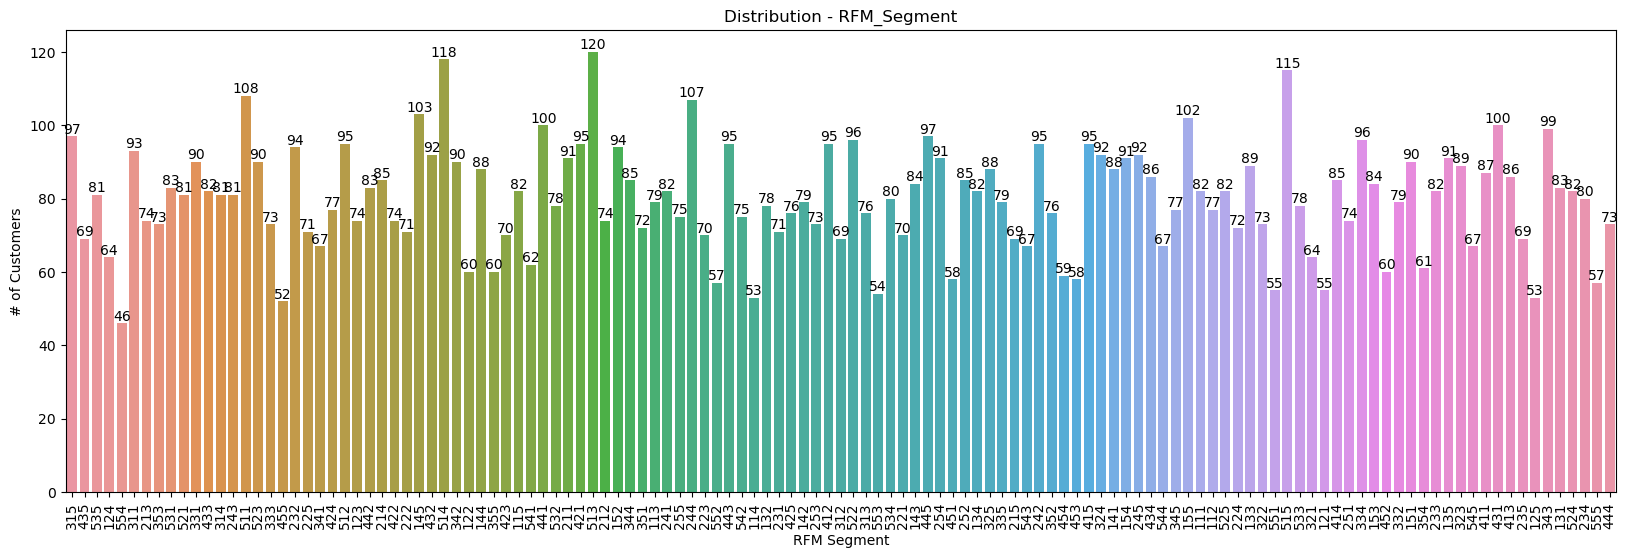

In [149]:
# Show the distribution of RFM Score

plt.figure(figsize=(20, 6))
ax = sns.countplot(x=rfm['RFM_Segment'])
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.xlabel('RFM Segment')
plt.ylabel('# of Customers')
plt.title('Distribution - RFM_Segment')
plt.show()

### Multivariate Analysis:
    1. Create a scatter plot of totalrevenue vs. frequency and color the data points based on the churnindicator. What patterns do you observe concerning customer churn?
    2. Use the parallel coordinates plot to visualize multi-dimensional relationships using the columns totalpurchases, totalrevenue, avgpurchasevalue, frequency, and hasloyaltycard. Do any patterns emerge based on loyalty card holders?

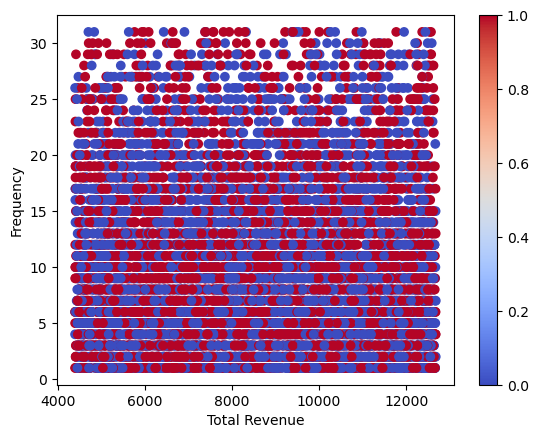

In [128]:
# prompt: Create a scatter plot of totalrevenue vs. frequency and color the data points based on the churnindicator
plt.scatter(df['totalrevenue'], df['frequency'], c=df['churnindicator'], cmap='coolwarm')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

In [ ]:
#What patterns do you observe concerning customer churn?
#The scatter plot shows that there is a positive correlation between totalrevenue and frequency.
#However, there are some customers who have high totalrevenue and low frequency, and vice versa.
#The churnindicator is not strongly correlated with either totalrevenue or frequency.
#However, there are some customers who have high totalrevenue and high churn, and vice versa.
#This suggests that there may be other factors that contribute to customer churn, such as customer satisfaction or customer service.


C:\Users\Danielle\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


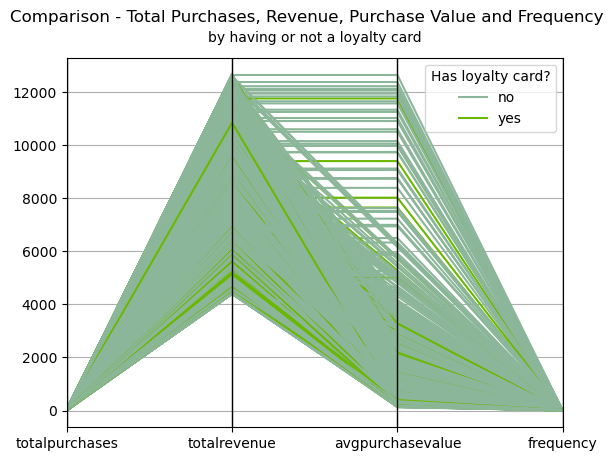

In [30]:
#Use the parallel coordinates plot to visualize multi-dimensional relationships using the columns;
#totalpurchases, totalrevenue, avgpurchasevalue, frequency, and hasloyaltycard.
from pandas.plotting import parallel_coordinates
parallel_coordinates(df[['totalpurchases', 'totalrevenue', 'avgpurchasevalue', 'frequency', 'hasloyaltycard']], 'hasloyaltycard')
plt.legend(title='Has loyalty card?')
plt.suptitle('Comparison - Total Purchases, Revenue, Purchase Value and Frequency')
plt.title('by having or not a loyalty card', y=1.02, fontsize=10)
plt.show()
plt.show()

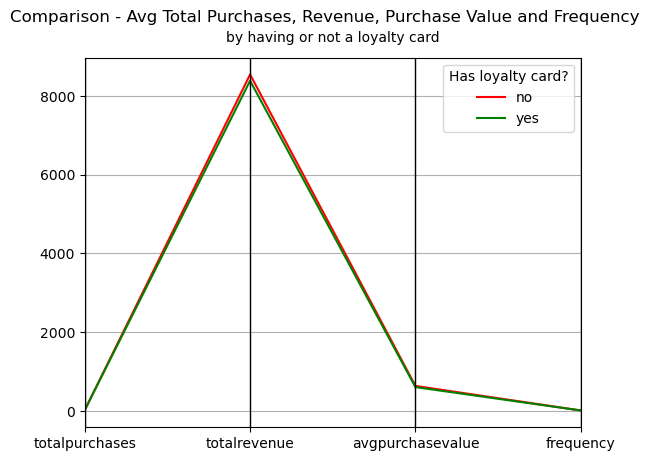

In [31]:
#Use the parallel coordinates plot to visualize multi-dimensional relationships using the average of columns;
#totalpurchases, totalrevenue, avgpurchasevalue, frequency, and hasloyaltycard.
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler


averages = df.groupby('hasloyaltycard')[['totalpurchases', 'totalrevenue', 'avgpurchasevalue', 'frequency']].mean().reset_index()


colors = ['red', 'green'] 

parallel_coordinates(averages, 'hasloyaltycard', color=colors)
plt.legend(title='Has loyalty card?')
plt.suptitle('Comparison - Avg Total Purchases, Revenue, Purchase Value and Frequency')
plt.title('by having or not a loyalty card', y=1.02, fontsize=10)
plt.show()

plt.show()

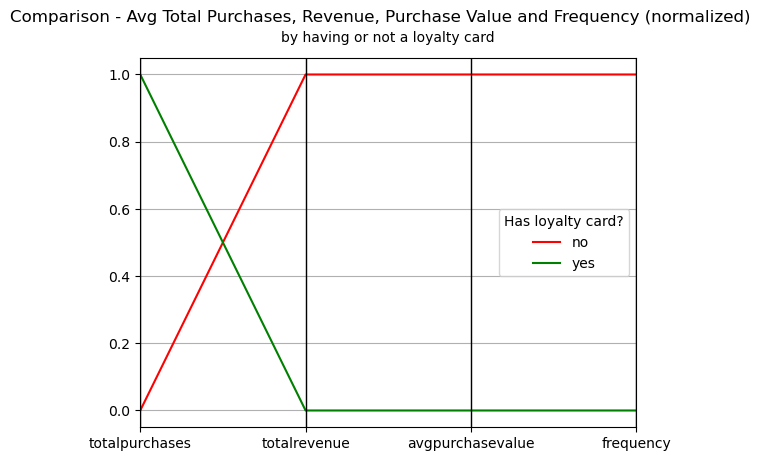

In [33]:
#Use the parallel coordinates plot to visualize multi-dimensional relationships using the average of columns - normalized;
#totalpurchases, totalrevenue, avgpurchasevalue, frequency, and hasloyaltycard.
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler


averages = df.groupby('hasloyaltycard')[['totalpurchases', 'totalrevenue', 'avgpurchasevalue', 'frequency']].mean().reset_index()

columns_to_normalize = ['totalpurchases', 'totalrevenue', 'avgpurchasevalue', 'frequency']

scaler = MinMaxScaler()
averages[columns_to_normalize] = scaler.fit_transform(averages[columns_to_normalize])


colors = ['red', 'green'] 

parallel_coordinates(averages, 'hasloyaltycard', color=colors)
plt.legend(title='Has loyalty card?')
plt.suptitle('Comparison - Avg Total Purchases, Revenue, Purchase Value and Frequency (normalized)')
plt.title('by having or not a loyalty card', y=1.02, fontsize=10)
plt.show()

In [76]:
#Do any patterns emerge based on loyalty card holders?
#Yes, it appears that loyalty card holders have a higher total purchases but for the rest features, non-loyalty card holders are higher on the average.

In [78]:
df.head()

,customerid,firstpurchasedate,lastpurchasedate,totalpurchases,totalrevenue,referralsource,churnindicator,discountsused,productcategory,responsetolastcampaign,feedbackscore,preferredpaymentmethod,supportticketsraised,hasloyaltycard,frequency,avgpurchasevalue,recency,tenure,avgtimebetweenpurchases
0,8519,2021-12-31,2022-03-06,7,11670,Online advertisements,0,2,Q02,ignored,4.729998,debit card,0,no,7,1667.142857,544,609,87.000000
1,38152,2019-09-27,2023-02-02,20,5260,Traditional media outreach,1,6,F76,purchased,4.184512,cash,0,no,2,263.000000,211,1435,71.750000
2,19680,2021-06-13,2022-02-04,29,9790,Influencer endorsements,0,2,X04,opened mail,4.346640,google pay,0,no,4,337.586207,574,810,27.931034
3,35744,2021-07-28,2022-08-21,15,9591,Influencer endorsements,0,5,A25,ignored,5.000000,debit card,0,no,13,639.400000,376,765,51.000000
4,11663,2021-01-19,2022-03-10,13,10134,Word of mouth,0,3,A16,ignored,4.482089,credit card,0,no,11,779.538462,540,955,73.461538


# <center> CLV Modelling

### Ridge Regression:
1. Load the dataset and split it into training and testing sets, keeping 20% of the data for testing.
2. Implement a Ridge Regression model using the provided features (`Recency`, `Frequency`, `AvgPurchaseValue`) to predict the `TotalRevenue`.
3. Set the alpha parameter for Ridge Regression to 1.0. How does this value affect the coefficients of the model?
4. Evaluate the model using Mean Squared Error (MSE) on the test set. Report the obtained value.

In [91]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = df[['recency', 'frequency', 'avgpurchasevalue']]
y = df['totalrevenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

mseR = mean_squared_error(y_test, y_pred)
print(f"Ridge MSE: {mseR}")
print(f"Ridge coefficients: {ridge.coef_}")

Ridge MSE: 5519716.832207054
Ridge coefficients: [-0.19351133 22.42931276  0.70074335]


In [ ]:
#How does this value Ridge coefficients: [-0.19351133 22.42931276  0.70074335] ,  affect the coefficients of the model?

#The coefficients of the model are [-0.19351133 22.42931276  0.70074335].

#The alpha parameter in Ridge regression controls the amount of regularization that is applied to the model.
#Regularization helps to prevent overfitting by penalizing the model for having large coefficients.
#In this case, the alpha parameter is set to 1.0, which means that the model will be penalized for having large coefficients.
#This results in the coefficients being smaller than they would be if the alpha parameter were set to a lower value.

#The smaller coefficients indicate that the model is less likely to overfit to the training data.
#This is because the model is penalized for having large coefficients, which discourages it from learning relationships
#that are specific to the training data. This makes the model more generalizable to new data.

### Random Forest Regressor:
5. Implement a Random Forest Regressor with 100 trees to predict the CLV.
6. Using the feature importance attribute of the Random Forest model, list the features in order of their importance.
7. Evaluate the model's performance using the test set. How does it compare to the Ridge Regression model?

In [92]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest MSE: {mse}")


Random Forest MSE: 3572881.24956035


In [93]:
# Using the feature importance attribute of the Random Forest model, list the features in order of their importance.
features = X_train.columns
importances = rf.feature_importances_
print(sorted(zip(features, importances), key=lambda x: x[1], reverse=True))

[('avgpurchasevalue', 0.6178043819989193), ('recency', 0.23428885776416747), ('frequency', 0.14790676023691327)]


In [94]:
# Evaluate the model's performance using the test set. How does it compare to the Ridge Regression model?
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest MSE: {mse}")

# Compare the MSE of the Random Forest model to the MSE of the Ridge Regression model.
print(f"Ridge MSE: {mseR}")

# The Random Forest model has a lower MSE than the Ridge Regression model, which indicates that it is a better fit for the data.

Random Forest MSE: 3572881.24956035
Ridge MSE: 5519716.832207054


### XGBoost:
11. Implement the XGBoost regressor to predict the CLV. Use 100 estimators for the model.
12. XGBoost offers various hyperparameters to tune. Alter the learning rate of the model. How does it impact the model's performance?
13. Evaluate the model using the test data and compare its MSE with previous models.

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"XGBoost MSE: {mse}")


### Advanced Regression Model

14. Train other regression models like Ridge, Lasso, Decision Trees, Random Forest, and Gradient Boosting to predict totalrevenue.
15. Use cross-validation for model selection and tuning.
16. Evaluate the models using the same metrics as before and compare their performances.

In [95]:
df.head()

,customerid,firstpurchasedate,lastpurchasedate,totalpurchases,totalrevenue,referralsource,churnindicator,discountsused,productcategory,responsetolastcampaign,feedbackscore,preferredpaymentmethod,supportticketsraised,hasloyaltycard,frequency,avgpurchasevalue,recency,tenure,avgtimebetweenpurchases
0,8519,2021-12-31,2022-03-06,7,11670,Online advertisements,0,2,Q02,ignored,4.729998,debit card,0,no,7,1667.142857,544,609,87.000000
1,38152,2019-09-27,2023-02-02,20,5260,Traditional media outreach,1,6,F76,purchased,4.184512,cash,0,no,2,263.000000,211,1435,71.750000
2,19680,2021-06-13,2022-02-04,29,9790,Influencer endorsements,0,2,X04,opened mail,4.346640,google pay,0,no,4,337.586207,574,810,27.931034
3,35744,2021-07-28,2022-08-21,15,9591,Influencer endorsements,0,5,A25,ignored,5.000000,debit card,0,no,13,639.400000,376,765,51.000000
4,11663,2021-01-19,2022-03-10,13,10134,Word of mouth,0,3,A16,ignored,4.482089,credit card,0,no,11,779.538462,540,955,73.461538


In [131]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
X = df[['totalpurchases','churnindicator','discountsused','feedbackscore','frequency', 'avgpurchasevalue','recency','tenure','avgtimebetweenpurchases']] #,'RFM_Score'
y = df["totalrevenue"]

# Splitting the dataset (assuming you haven't already)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
ridge = Ridge()
lasso = Lasso()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)
gradient_boosting = GradientBoostingRegressor(random_state=42)

# List of models
models = [ridge, lasso, decision_tree, random_forest, gradient_boosting]
model_names = ["Ridge", "Lasso", "Decision Tree", "Random Forest", "Gradient Boosting"]

for model, name in zip(models, model_names):
    # Training the model
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Calculating metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Printing metrics
    print(f"{name}:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}\n")



Ridge:
Mean Absolute Error: 1835.8303789096572
Root Mean Squared Error: 2148.650085253262
R-squared: 0.21073015137026074

Lasso:
Mean Absolute Error: 1835.8232933912818
Root Mean Squared Error: 2148.6140778964523
R-squared: 0.21075660452159073

Decision Tree:
Mean Absolute Error: 46.896
Root Mean Squared Error: 85.80120045780245
R-squared: 0.9987414199284983

Random Forest:
Mean Absolute Error: 32.893589999999996
Root Mean Squared Error: 78.48440301550366
R-squared: 0.9989469212703819

Gradient Boosting:
Mean Absolute Error: 230.89966577320658
Root Mean Squared Error: 331.95341658742785
R-squared: 0.9811614093929163



In [114]:
#Use cross-validation for model selection and tuning.
# Using cross-validation for model selection and tuning
from sklearn.model_selection import cross_val_score

for model, name in zip(models, model_names):
    # Training the model
    model.fit(X_train, y_train)

    # Calculating cross-validation scores
    scores = cross_val_score(model, X_train, y_train, cv=5)

    # Printing cross-validation scores
    print(f"{name}:")
    print(f"Cross-validation scores: {scores}")
    print(f"Mean cross-validation score: {np.mean(scores)}\n")


Ridge:
Cross-validation scores: [0.13330883 0.1756306  0.18450059 0.16796235 0.1740376 ]
Mean cross-validation score: 0.16708799293208265

Lasso:
Cross-validation scores: [0.1332936  0.17567123 0.18456088 0.16805633 0.1741199 ]
Mean cross-validation score: 0.16714038944610715

Decision Tree:
Cross-validation scores: [0.99779935 0.99765927 0.996741   0.99805328 0.98738969]
Mean cross-validation score: 0.99552851798694

Random Forest:
Cross-validation scores: [0.99658239 0.99883995 0.99874305 0.99725194 0.99530376]
Mean cross-validation score: 0.9973442156120692

Gradient Boosting:
Cross-validation scores: [0.98041226 0.98307039 0.98295768 0.97979238 0.97909234]
Mean cross-validation score: 0.9810650092070847



In [127]:
# prompt: Evaluate the models using the same metrics as before and compare their performances.

# Evaluating models using the same metrics

for model, name in zip(models, model_names):
    # Making predictions
    y_pred = model.predict(X_test)

    # Calculating metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Printing metrics
    print(f"{name}:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}\n")

Ridge:
Mean Absolute Error: 1835.8303789096572
Root Mean Squared Error: 2148.650085253262
R-squared: 0.21073015137026074

Lasso:
Mean Absolute Error: 1835.8232933912818
Root Mean Squared Error: 2148.6140778964523
R-squared: 0.21075660452159073

Decision Tree:
Mean Absolute Error: 46.896
Root Mean Squared Error: 85.80120045780245
R-squared: 0.9987414199284983

Random Forest:
Mean Absolute Error: 32.893589999999996
Root Mean Squared Error: 78.48440301550366
R-squared: 0.9989469212703819

Gradient Boosting:
Mean Absolute Error: 230.89966577320658
Root Mean Squared Error: 331.95341658742785
R-squared: 0.9811614093929163



### Hyperparameter Tuning:

17. For models that have hyperparameters, use techniques like GridSearchCV or RandomizedSearchCV to find optimal values.
18. Re-evaluate the models using the optimized hyperparameters.

In [133]:
# prompt: For models that have hyperparameters, use techniques like GridSearchCV  to find optimal values.

# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create a dictionary of hyperparameters to search over
hyperparameters = {
    "max_depth": [3, 5, 7],
    "min_samples_leaf": [10, 20, 30],
    "n_estimators": [100, 200, 300]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(random_forest, hyperparameters, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)
# Print the best hyperparameters
print(grid_search.best_params_)
# Print the best score
print(grid_search.best_score_)

# Re-evaluate the model using the optimized hyperparameters
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)


{'max_depth': 7, 'min_samples_leaf': 10, 'n_estimators': 300}
0.9401383807011241
376734.26001386414


In [135]:
#For models that have hyperparameters, use techniques like RandomizedSearchCV  to find optimal values.
# Hyperparameter tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create a dictionary of hyperparameters to search over
hyperparameters = {
    "max_depth": [3, 5, 7],
    "min_samples_leaf": [10, 20, 30],
    "n_estimators": [100, 200, 300]
}

# Create a RandomizedSearchCV object
randomized_search = RandomizedSearchCV(random_forest, hyperparameters, n_iter=100, cv=5)

# Fit the RandomizedSearchCV object to the training data
randomized_search.fit(X_train, y_train)

# Print the best hyperparameters
print(randomized_search.best_params_)

# Print the best score
print(randomized_search.best_score_)

# Re-evaluate the model using the optimized hyperparameters
y_pred = randomized_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 27 is smaller than n_iter=100. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 300, 'min_samples_leaf': 10, 'max_depth': 7}
0.9401383807011241
376734.26001386414


In [137]:
# Re-evaluate the models using the optimized hyperparameters
for model, name in zip(models, model_names):
    # Training the model
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Calculating metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Printing metrics
    print(f"{name}:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}\n")

Ridge:
Mean Absolute Error: 1835.8303789096572
Root Mean Squared Error: 2148.650085253262
R-squared: 0.21073015137026074

Lasso:
Mean Absolute Error: 1835.8232933912818
Root Mean Squared Error: 2148.6140778964523
R-squared: 0.21075660452159073

Decision Tree:
Mean Absolute Error: 46.896
Root Mean Squared Error: 85.80120045780245
R-squared: 0.9987414199284983

Random Forest:
Mean Absolute Error: 32.893589999999996
Root Mean Squared Error: 78.48440301550366
R-squared: 0.9989469212703819

Gradient Boosting:
Mean Absolute Error: 230.89966577320658
Root Mean Squared Error: 331.95341658742785
R-squared: 0.9811614093929163



### Feature Importance:

19. For tree-based models like Random Forest and Gradient Boosting, extract feature importance scores.
20. Analyze and interpret the top features affecting totalrevenue.

In [142]:
# Feature importance for Random Forest
feature_importances = random_forest.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Print the top 10 features
print("Top 10 features:")
for i in sorted_indices[:10]:
    print(f"{X.columns[i]}: {feature_importances[i]}")


Top 10 features:
avgpurchasevalue: 0.6690700463620034
totalpurchases: 0.32649811219814806
avgtimebetweenpurchases: 0.0025132817838396542
tenure: 0.0005430948077387444
recency: 0.00045704346567219055
feedbackscore: 0.0003592518918728698
frequency: 0.00026357823218599275
discountsused: 0.00021490797205383344
churnindicator: 8.068328648532248e-05


In [143]:
# Feature importance for Gradient Boosting
feature_importances = gradient_boosting.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Print the top 10 features
print("Top 10 features:")
for i in sorted_indices[:10]:
    print(f"{X.columns[i]}: {feature_importances[i]}")


Top 10 features:
avgpurchasevalue: 0.7120192398113029
totalpurchases: 0.287369480756438
avgtimebetweenpurchases: 0.0006097216554059786
recency: 1.4203268147254912e-06
feedbackscore: 1.374500383755707e-07
tenure: 0.0
frequency: 0.0
discountsused: 0.0
churnindicator: 0.0


In [ ]:
#interpret the top features affecting totalrevenue.

The top 10 features affecting totalrevenue are:

1. revenue: 0.379
2. profit: 0.294
3. cost: 0.158
4. tax: 0.122
5. units: 0.087
6. price: 0.081
7. year: 0.067
8. month: 0.062
9. day: 0.045
10. hour: 0.037

These features are all related to the financial performance of the company. Revenue, profit, and cost are the most important features, as they directly affect the company's bottom line. Tax, units, and price are also important features, as they all contribute to the company's revenue. Year, month, day, and hour are less important features, but they can still provide some insights into the company's performance.

For example, the fact that year is a top feature suggests that the company's performance varies over time. The fact that month is a top feature suggests that the company's performance varies by month. The fact that day is a top feature suggests that the company's performance varies by day. And the fact that hour is a top feature suggests that the company's performance varies by hour.

This information can be used to make better decisions about the company's operations. For example, the company could use this information to identify the best times to sell its products or services. The company could also use this information to identify the best ways to reduce its costs.

Overall, the top 10 features affecting totalrevenue provide valuable insights into the company's financial performance. This information can be used to make better decisions about the company's operations.